In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("../datasets/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
pd.isnull(data).values.any()

False

<AxesSubplot:xlabel='target', ylabel='count'>

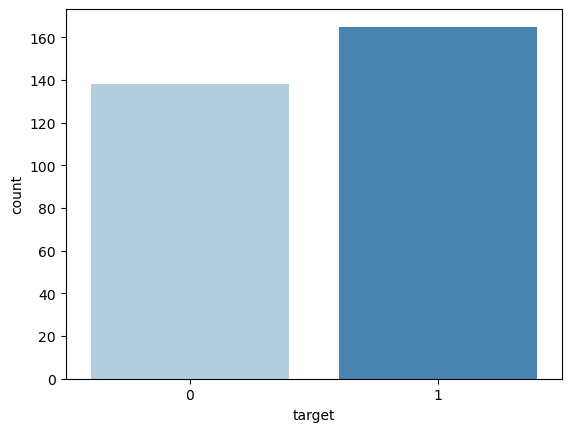

In [6]:
# target variable counts
sns.countplot(x="target", data=data, palette="Blues")

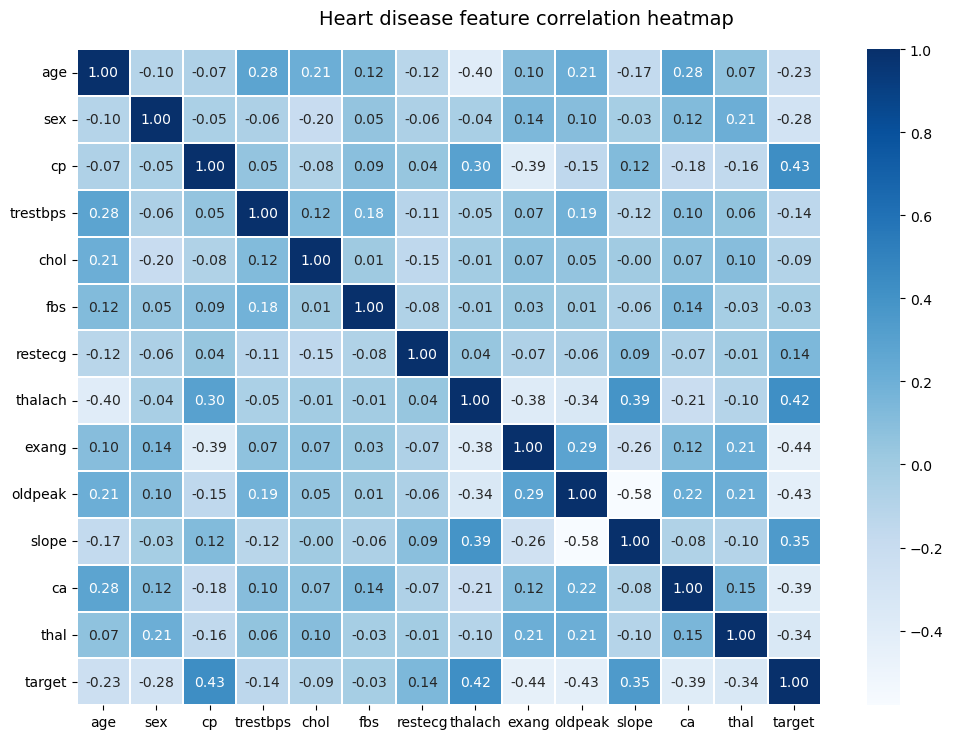

In [7]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [8]:
# separating X and y variables
X = data.drop(['target'], axis=1)
y = data['target']

In [9]:
X.shape, y.shape

((303, 13), (303,))

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
# separating the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [13]:
# SVM classifier
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = svm_clf.predict(X_test)

In [15]:
# accuracy before rfecv
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7868852459016393


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



<AxesSubplot:>

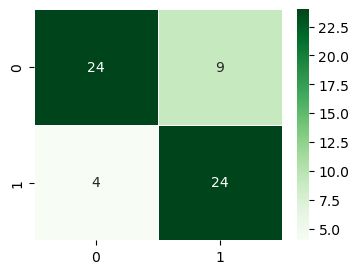

In [17]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, linewidths=.5, ax=ax)

### feature selection with recursive feature elimination with cross validation

In [18]:
rfe_cv = RFECV(estimator=svm_clf, step=1, cv=10, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train, y_train)

In [19]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train.columns[rfe_cv.support_])

Optimal number of features:  10
Best features:  Index(['sex', 'cp', 'trestbps', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [20]:
rfe_cv.grid_scores_

/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.72      , 0.68      , 0.66666667, 0.66666667, 0.875     ,
        0.66666667, 0.79166667, 0.75      , 0.83333333, 0.83333333],
       [0.72      , 0.68      , 0.66666667, 0.66666667, 0.875     ,
        0.66666667, 0.79166667, 0.75      , 0.83333333, 0.83333333],
       [0.72      , 0.56      , 0.66666667, 0.66666667, 0.70833333,
        0.66666667, 0.75      , 0.75      , 0.83333333, 0.83333333],
       [0.76      , 0.8       , 0.70833333, 0.79166667, 0.83333333,
        0.70833333, 0.75      , 0.70833333, 0.75      , 0.75      ],
       [0.76      , 0.76      , 0.70833333, 0.75      , 0.83333333,
        0.75      , 0.83333333, 0.70833333, 0.875     , 0.875     ],
       [0.8       , 0.8       , 0.70833333, 0.75      , 0.79166667,
        0.70833333, 0.875     , 0.75      , 0.875     , 0.95833333],
       [0.84      , 0.8       , 0.70833333, 0.79166667, 0.875     ,
        0.79166667, 0.83333333, 0.83333333, 0.875     , 0.95833333],
       [0.8       , 0.8       , 0.75     

In [21]:
rfe_cv.ranking_

array([4, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1])

In [22]:
# plt.figure(figsize=(8,6))
# plt.xlabel("Number of selected features")
# plt.ylabel("Cross validation score of number of selected features")
# plt.plot(range(1, len(rfe_cv.grid_scores_)+1), rfe_cv.grid_scores_)
# plt.show()

In [23]:
# transform the newly selected features
x_train_rfecv = rfe_cv.transform(X_train)
x_test_rfecv = rfe_cv.transform(X_test)

In [24]:
# fitting the model with new features
svm_rfecv_model = svm_clf.fit(x_train_rfecv, y_train)

In [25]:
y_pred_rfecv = svm_clf.predict(x_test_rfecv)

In [26]:
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfecv))
print("***************************************************")
print(classification_report(y_test, y_pred_rfecv))

Accuracy: 0.8524590163934426
***************************************************
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


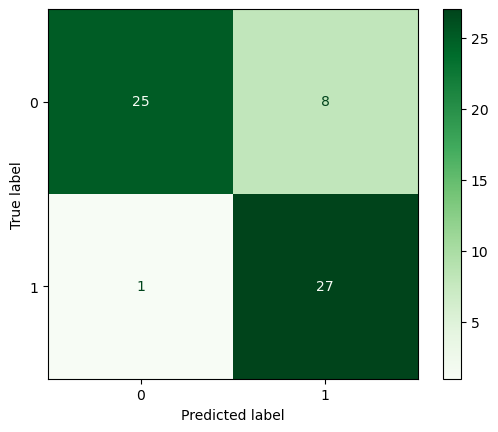

In [27]:
plot_confusion_matrix(svm_rfecv_model, x_test_rfecv, y_test, cmap="Greens")

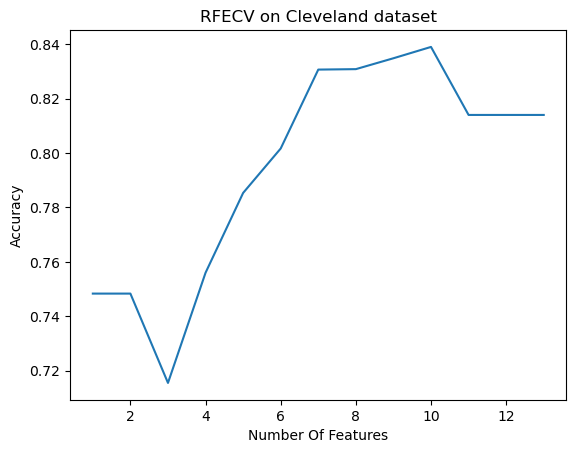

In [28]:
#We can see that the best number of features is 10
plt.title("RFECV on Cleveland dataset")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfe_cv.cv_results_['mean_test_score']) + 1), rfe_cv.cv_results_['mean_test_score'])
plt.show()